# Telecom Churn Case Study

#### Project Objective, Goals and assumptions

**Summary**: customer retention is of critical importance in telecom industry as customers have freedom to choose the service provider. This results in annual average industry churn rate of 15-25%. It costs 5-10 times more to acquire a new customer than to retain an existing one. In pre-paid model of subscription, the customers need not inform the operator if they want to switch. They can simply stop using the services. In post-paid,model customers must terminate the services with the service provider. It is hence a very challenging task to identify customers of pre-paid model who might leave the service provider. This model is used highly in Indian and Southeast Asian markets. The dataset provided for case study is from this market.<br/>

**Business Objectives**: 
- To **reduce customer churn** by **retaining high profit customers** 
- To **identify** the **reason for churn** based on available data.<br/>

**Aim**: To develop two models to enable the identified business objective:
-  A predictive classification model that can tag a high value churn customers 
-  A regression model to identify the reasons for churn of customers.<br/>

**Method and Methodology**:
1.  Preprocess data for sanity using checks for null values, duplicates and ensure data is in correct format
2.  Conduct exploratory analysis with appropriate visualizations
3.  Derive new features 
4.  Use PCA and reduce number of features
5.  Train and tune models to tag churners 
6.  Evaluate and compare models created
7.  Choose a model for filtering high-value customers and tagging churners
8.  Create models to identify attributes responsible for high-value churn customers
9.  Evaluate and compare models created
10. Choose a model to identify attributes responsible for high-value churn customers
11. Visualize and analyze the idenified attributes against churn
12. Recommend strategies to manage customer churn. <br/>

**Assumptions, Defintions, etc. if any, with source where borrowed from Internet**:

**Definition of Churn** for model: Usage-based churn i.e. 'Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time'

**ARPU**: It is a measure of the revenue generated by one customer phone per month.  ARPU includes not only the revenues billed to the customer each month for usage, but also the revenue generated from incoming calls, payable within the regulatory interconnection regime. (SOURCE: https://en.wikipedia.org/wiki/Average_revenue_per_user)

**Month Numbering**:June, July, August and September encoded as 6, 7, 8 and 9, respectively.

**Phases**:
- Good phase - June, July
- Action phase - August
- Churn phase - September

**High value customers**: The customers with recharge amount greater than or equal to 70th percentile of the average recharge amount in the first two months

## Import Libraries

In [1]:
# libraries
import math
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import re
import time

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Data Load and Sanity Checks - Preparation
Use checks for null values, duplicates and ensure data is in correct format and type. Fix details where necessary and Drop columns that are not needed.

In [2]:
customers = pd.read_csv('telecom_churn_data.csv', parse_dates=['last_date_of_month_6', 
                                                               'last_date_of_month_7', 
                                                               'last_date_of_month_8', 
                                                               'last_date_of_month_9', 
                                                               'date_of_last_rech_6', 
                                                               'date_of_last_rech_7', 
                                                               'date_of_last_rech_8', 
                                                               'date_of_last_rech_9', 
                                                               'date_of_last_rech_data_6', 
                                                               'date_of_last_rech_data_7', 
                                                               'date_of_last_rech_data_8', 
                                                               'date_of_last_rech_data_9'],
                         dayfirst = False )
customers.columns.values
#Mobile numbers can be used as index. However, for further processing and duplicate checks, 
#                                                         it is not retained as index here.

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(customers.head())

   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0           2014-09-30  197.385  214.816 

In [4]:
# Since column count is usually more than the default Jupyter settings, let's refit the visible columns
# Expect some new column additions for deriving new dummy columns from existing data hence setting the column limit 100
pd.set_option('max_columns', 900)
pd.set_option('display.max_colwidth', 150)
pd.set_option('max_rows', None)

In [5]:
# Check if there are any true duplicates
churn_dup = customers[customers.duplicated(keep=False)]
print ('churn_data dataframe:', customers.shape , '; Duplicate dataframe:', churn_dup.shape)
customers.head(2)

churn_data dataframe: (99999, 226) ; Duplicate dataframe: (0, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6

#### As seen, there are `no true duplicates`

Let's check if we have  `duplicates in mobile number`

In [6]:
print("(Rows, Columns) of dataset before dropping duplicates is :", format(customers.shape))
customers = customers.drop_duplicates('mobile_number')
print("(Rows, Columns) of dataset after dropping duplicates is :", format(customers.shape))
customers.set_index('mobile_number').head(2)

(Rows, Columns) of dataset before dropping duplicates is : (99999, 226)
(Rows, Columns) of dataset after dropping duplicates is : (99999, 226)


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN

In [7]:
# See stats in each column
print(customers.describe())

       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.5

#### Initial observations, inferences and decisions:
1. Following columns have zero standard deviation and can be dropped
 - `circle_id`
 - `loc_og_t2o_mou`
 - `std_og_t2o_mou`
 - `loc_ic_t2o_mou`
 - `std_og_t2c_mou_6` 
 - `std_og_t2c_mou_7` 
 - `std_og_t2c_mou_8`  
 - `std_og_t2c_mou_9` 
 - `std_ic_t2o_mou_6` 
 - `std_ic_t2o_mou_7`  
 - `std_ic_t2o_mou_8`  
 - `std_ic_t2o_mou_9`
2. All numeric columns can have null value as 0 as the columns indicate monetary amount, count or duration. Also, number of nulls in `max_recharge_*` and `total_recharge_*` are same, indicating that this is indeed a period of no activity.
3. For `total recharge`, if the amount is null, the total can be calculated and set.
3. Dates are null in some columns. 
- For recharge activity, this indicates no activity on such dates. Can we derive new parameter called days since recharge and remove these dates?
- For last day of month, it will be same throughout. This has to be processed before above derivation.
4. High value customers can also be focussed on other value added services. Feature that counts the number of, and amount used, for such subscriptions can be derived. For example: `uses_3g`, `uses_2g`, `uses_other`, etc. can be derived.
5. Columns not in correct naming scheme are: `*_vbc_3g`. These must be renamed.
6. There are no duplicates in the data frame.

### Rename Columns `for ease in identification`

In [8]:
customers.rename(columns={ 'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7', 
                          'aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

### Drop Columns that don't add value to the analysis ; 
`Single values` don't contribute to the analysis and are `excluded from the dataset `

In [9]:
customers.drop([ 'circle_id',  'loc_og_t2o_mou',  'std_og_t2o_mou',  'loc_ic_t2o_mou',  
                'std_og_t2c_mou_6',  'std_og_t2c_mou_7',  'std_og_t2c_mou_8', 'std_og_t2c_mou_9',  
                'std_ic_t2o_mou_6',  'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8','std_ic_t2o_mou_9']
               ,inplace=True, axis=1)

### Treat NULL Values within the dataset 

In [10]:
#Print count of current null values per columns
nas = customers.isna().sum()
nas = nas[nas >0]
for name in nas.index:
        print(name,' has ',nas[name],' count of null values')

last_date_of_month_7  has  601  count of null values
last_date_of_month_8  has  1100  count of null values
last_date_of_month_9  has  1659  count of null values
onnet_mou_6  has  3937  count of null values
onnet_mou_7  has  3859  count of null values
onnet_mou_8  has  5378  count of null values
onnet_mou_9  has  7745  count of null values
offnet_mou_6  has  3937  count of null values
offnet_mou_7  has  3859  count of null values
offnet_mou_8  has  5378  count of null values
offnet_mou_9  has  7745  count of null values
roam_ic_mou_6  has  3937  count of null values
roam_ic_mou_7  has  3859  count of null values
roam_ic_mou_8  has  5378  count of null values
roam_ic_mou_9  has  7745  count of null values
roam_og_mou_6  has  3937  count of null values
roam_og_mou_7  has  3859  count of null values
roam_og_mou_8  has  5378  count of null values
roam_og_mou_9  has  7745  count of null values
loc_og_t2t_mou_6  has  3937  count of null values
loc_og_t2t_mou_7  has  3859  count of null values

#### Check total null values

In [11]:
a = pd.DataFrame(round(100*(customers.isnull().sum()/len(customers.index)), 2)).reset_index()
a.columns = ['column_name', 'null_pct']
a = a.loc[ (a['null_pct'] > 0) , :]
a.sort_values(by='null_pct', ascending=False)

,column_name,null_pct
153,max_rech_data_6,74.85
145,date_of_last_rech_data_6,74.85
205,fb_user_6,74.85
161,count_rech_3g_6,74.85
177,arpu_3g_6,74.85
149,total_rech_data_6,74.85
185,night_pck_user_6,74.85
157,count_rech_2g_6,74.85
165,av_rech_amt_data_6,74.85
181,arpu_2g_6,74.85


#### Fix `NULL Dates`

In [12]:
# Fix NULL Dates
# 1. Last date of month is same for all columns. set the same for nulls
customers.fillna({'last_date_of_month_7': pd.to_datetime('7/31/2014'), 'last_date_of_month_8': pd.to_datetime('8/31/2014'), 'last_date_of_month_9': pd.to_datetime('9/30/2014')},inplace=True)
#Print count of current null values per columns
nas = customers[['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']].isna().sum()
nas = nas[nas >0]
for name in nas.index:
        print(name,' has ',nas[name],' count of null values')
customers[['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']].describe()

,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9
count,99999,99999,99999
unique,1,1,1
top,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00
freq,99999,99999,99999
first,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00
last,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00


In [13]:
# Fix Null Dates
# 2. Date of last recharge for data and prepaid top-up.
# We are DERIVING A NEW COLUMN called days since last recharge.
# Where date_of_last_rech_6 is NULL, it is initialized to days since last date of May.
# This is an optimistic estimate.
initial_date = pd.to_datetime('5/31/2014')
customers['days_since_recharge_6'] = (customers['last_date_of_month_6']- \
                                      customers['date_of_last_rech_6']).dt.days
customers['days_since_recharge_6'] = customers['days_since_recharge_6'].fillna((customers['last_date_of_month_6']-\
                                                                                initial_date).dt.days)

customers['days_since_recharge_data_6'] = (customers['last_date_of_month_6']- \
                                           customers['date_of_last_rech_data_6']).dt.days
customers['days_since_recharge_data_6'] = customers['days_since_recharge_data_6'].fillna((\
                                           customers['last_date_of_month_6']-initial_date).dt.days)

customers['days_since_recharge_7'] = customers['days_since_recharge_6']  +\
                            ((customers['last_date_of_month_7']-customers['last_date_of_month_6'])).dt.days
customers['days_since_recharge_7'] = customers['days_since_recharge_7'].fillna((customers['last_date_of_month_7']- \
                                           customers['date_of_last_rech_7']).dt.days)

customers['days_since_recharge_data_7'] = customers['days_since_recharge_data_6']  + \
                            ((customers['last_date_of_month_7']-customers['last_date_of_month_6'])).dt.days
customers['days_since_recharge_data_7'] = customers['days_since_recharge_data_7'].fillna((\
                                           customers['last_date_of_month_7']- \
                                           customers['date_of_last_rech_data_7']).dt.days)

customers['days_since_recharge_8'] = customers['days_since_recharge_7']  + \
                                    ((customers['last_date_of_month_8']-customers['last_date_of_month_7'])).dt.days
customers['days_since_recharge_8'] = customers['days_since_recharge_8'].fillna((customers['last_date_of_month_8']\
                                           - customers['date_of_last_rech_8']).dt.days)

customers['days_since_recharge_data_8'] = customers['days_since_recharge_data_7']  + \
                                   ((customers['last_date_of_month_8']-customers['last_date_of_month_7'])).dt.days
customers['days_since_recharge_data_8'] = customers['days_since_recharge_data_8'].fillna((\
                                            customers['last_date_of_month_8']- \
                                            customers['date_of_last_rech_data_8']).dt.days)

customers['days_since_recharge_9'] = customers['days_since_recharge_8']  + \
                                    ((customers['last_date_of_month_9']-customers['last_date_of_month_8'])).dt.days
customers['days_since_recharge_9'] = customers['days_since_recharge_9'].fillna((customers['last_date_of_month_9']-\
                                            customers['date_of_last_rech_9']).dt.days)

customers['days_since_recharge_data_9'] = customers['days_since_recharge_data_8']  + \
                                  ((customers['last_date_of_month_9']-customers['last_date_of_month_8'])).dt.days
customers['days_since_recharge_data_9'] = customers['days_since_recharge_data_9'].fillna((\
                                           customers['last_date_of_month_9']- \
                                           customers['date_of_last_rech_data_9']).dt.days)

customers[['days_since_recharge_6','days_since_recharge_7','days_since_recharge_8',\
           'days_since_recharge_9','days_since_recharge_data_6','days_since_recharge_data_7',\
           'days_since_recharge_data_8','days_since_recharge_data_9']].describe()

,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,days_since_recharge_9,days_since_recharge_data_6,days_since_recharge_data_7,days_since_recharge_data_8,days_since_recharge_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,6.279663,37.279663,68.279663,98.279663,25.207972,56.207972,87.207972,117.207972
std,6.803039,6.803039,6.803039,6.803039,9.308151,9.308151,9.308151,9.308151
min,0.000000,31.000000,62.000000,92.000000,0.000000,31.000000,62.000000,92.000000
25%,1.000000,32.000000,63.000000,93.000000,29.000000,60.000000,91.000000,121.000000
50%,3.000000,34.000000,65.000000,95.000000,30.000000,61.000000,92.000000,122.000000
75%,10.000000,41.000000,72.000000,102.000000,30.000000,61.000000,92.000000,122.000000
max,30.000000,61.000000,92.000000,122.000000,30.000000,61.000000,92.000000,122.000000


In [14]:
#Check Nulls again!  
a = pd.DataFrame(round(100*(customers.isnull().sum()/len(customers.index)), 2)).reset_index()
a.columns = ['column_name', 'null_pct']
a = a.loc[ (a['null_pct'] > 0) , :]
a.sort_values(by='null_pct', ascending=False)

,column_name,null_pct
161,count_rech_3g_6,74.85
205,fb_user_6,74.85
181,arpu_2g_6,74.85
165,av_rech_amt_data_6,74.85
185,night_pck_user_6,74.85
157,count_rech_2g_6,74.85
153,max_rech_data_6,74.85
177,arpu_3g_6,74.85
149,total_rech_data_6,74.85
145,date_of_last_rech_data_6,74.85


##### Drop date columns since the derivatives are obtained as other numerical columns for usage

In [15]:
#Drop date columns since the derivatives are obtained as other numerical columns for usage
customers.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                'date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7',
                'date_of_last_rech_data_8','date_of_last_rech_data_9'],inplace=True, axis=1)

#### Fix numeric NULL Values

`Impute all the NaN Numeric values with 0 as this would mean no usage/no recharge/count and does not affect the data integrity`

In [16]:
#Fix NULL values in count, monetory amount with zero
customers = customers.fillna(0)

In [17]:
a = pd.DataFrame(round(100*(customers.isnull().sum()/len(customers.index)), 2)).reset_index()
a.columns = ['column_name', 'null_pct']
a = a.loc[ (a['null_pct'] > 0) , :]
a.sort_values(by='null_pct', ascending=False)

,column_name,null_pct


As seen above, null values are imputed and there are `no null values` !

###  Derive some more features useful for analysis - Feature Engineering and Initial Analysis 
1. Did Minutes of Usage (MOU) increase/decrease during Action phase as compared to Good phase ? 
2. Did Internet consumption volume increase/decrease during Actionn phase as compared to Good phase ?
3. Did Average Revenue Per User (ARPU) increase/decrease during Actionn phase as compared to Good phase ?
4. Days since recharge for data and voice per month was already derived to preserve data during NULL value resolution.
5. Derive `uses_3g`, `uses_2g`, etc. to track usage requirements and preferences of customers.
6. The data must be split in to 3 phases as per problem statement. Combine months 6 and 7 carefully.

In [18]:
cols = [colregex for colregex in customers.columns if ('mou') in colregex]
col6 = [colregex for colregex in cols if ('6') in colregex]
col7 = [colregex for colregex in cols if ('7') in colregex]
coltot = col6 +  col7
print("Good Phase (6th and 7th month) Minutes of Usage columns :",list(coltot))
customers['usage_good_phase'] =  customers[coltot].sum(axis=1)

Good Phase (6th and 7th month) Minutes of Usage columns : ['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou

In [19]:
cols = [colregex for colregex in customers.columns if ('mou') in colregex]
col8 = [colregex for colregex in cols if ('8') in colregex]
print("Action Phase (8th month) Minutes of Usage columns :",list(col8))
customers['usage_action_phase'] =  customers[col8].sum(axis=1)

Action Phase (8th month) Minutes of Usage columns : ['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8']


In [20]:
customers['usage_action_phase'].head(3)

0      16.32
1    2506.79
2    2235.91
Name: usage_action_phase, dtype: float64

In [21]:
customers['usage_decrease'] = np.where((customers['usage_action_phase'] < customers['usage_good_phase']), 1,0)

In [22]:
a = pd.DataFrame(customers.groupby(['usage_decrease'])['mobile_number'].count()).reset_index()
a.columns = ['column_name', 'count']
a = a.loc[ (a['count'] > 0) , :]
a.sort_values(by='count', ascending=False)

,column_name,count
1,1,86597
0,0,13402


In [23]:
cols = [colregex for colregex in customers.columns if ('vol') in colregex]
col6 = [colregex for colregex in cols if ('6') in colregex]
col7 = [colregex for colregex in cols if ('7') in colregex]
coltot = col6 +  col7
print("Good Phase internet consumption volume :",list(coltot))
customers['vol_good_phase'] =  customers[coltot].sum(axis=1)

Good Phase internet consumption volume : ['vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_7']


In [24]:
cols = [colregex for colregex in customers.columns if ('vol') in colregex]
col8 = [colregex for colregex in cols if ('8') in colregex]
print("Action Phase internet consumption volume :",list(col8))
customers['vol_action_phase'] =  customers[col8].sum(axis=1)

Action Phase internet consumption volume : ['vol_2g_mb_8', 'vol_3g_mb_8']


In [25]:
customers['vol_usage_decrease'] = np.where((customers['vol_action_phase'] < customers['vol_good_phase']), 1,0)

In [26]:
a = pd.DataFrame(customers.groupby(['vol_usage_decrease'])['mobile_number'].count()).reset_index()
a.columns = ['column_name', 'count']
a = a.loc[ (a['count'] > 0) , :]
a.sort_values(by='count', ascending=False)

,column_name,count
0,0,74935
1,1,25064


In [27]:
cols = [colregex for colregex in customers.columns if ('arpu') in colregex]
col6 = [colregex for colregex in cols if ('6') in colregex]
col7 = [colregex for colregex in cols if ('7') in colregex]
coltot = col6 +  col7
print("Good Phase ARPU :",list(coltot))
customers['arpu_good_phase'] =  customers[coltot].sum(axis=1)

Good Phase ARPU : ['arpu_6', 'arpu_3g_6', 'arpu_2g_6', 'arpu_7', 'arpu_3g_7', 'arpu_2g_7']


In [28]:
cols = [colregex for colregex in customers.columns if ('arpu') in colregex]
col8 = [colregex for colregex in cols if ('8') in colregex]
print("Action Phase ARPU :",list(col8))
customers['arpu_action_phase'] =  customers[col8].sum(axis=1)

Action Phase ARPU : ['arpu_8', 'arpu_3g_8', 'arpu_2g_8']


In [29]:
customers['arpu_decrease'] = np.where((customers['arpu_action_phase'] < customers['arpu_good_phase']), 1,0)

In [30]:
a = pd.DataFrame(customers.groupby(['arpu_decrease'])['mobile_number'].count()).reset_index()
a.columns = ['column_name', 'count']
a = a.loc[ (a['count'] > 0) , :]
a.sort_values(by='count', ascending=False)

,column_name,count
1,1,85825
0,0,14174


In [31]:
customers.shape

(99999, 223)

In [32]:
# Print description of the first set of colums that are already created
customers[['days_since_recharge_6','days_since_recharge_7','days_since_recharge_8'
           ,'days_since_recharge_9','days_since_recharge_data_6','days_since_recharge_data_7',
           'days_since_recharge_data_8','days_since_recharge_data_9']].describe()

,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,days_since_recharge_9,days_since_recharge_data_6,days_since_recharge_data_7,days_since_recharge_data_8,days_since_recharge_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,6.279663,37.279663,68.279663,98.279663,25.207972,56.207972,87.207972,117.207972
std,6.803039,6.803039,6.803039,6.803039,9.308151,9.308151,9.308151,9.308151
min,0.000000,31.000000,62.000000,92.000000,0.000000,31.000000,62.000000,92.000000
25%,1.000000,32.000000,63.000000,93.000000,29.000000,60.000000,91.000000,121.000000
50%,3.000000,34.000000,65.000000,95.000000,30.000000,61.000000,92.000000,122.000000
75%,10.000000,41.000000,72.000000,102.000000,30.000000,61.000000,92.000000,122.000000
max,30.000000,61.000000,92.000000,122.000000,30.000000,61.000000,92.000000,122.000000


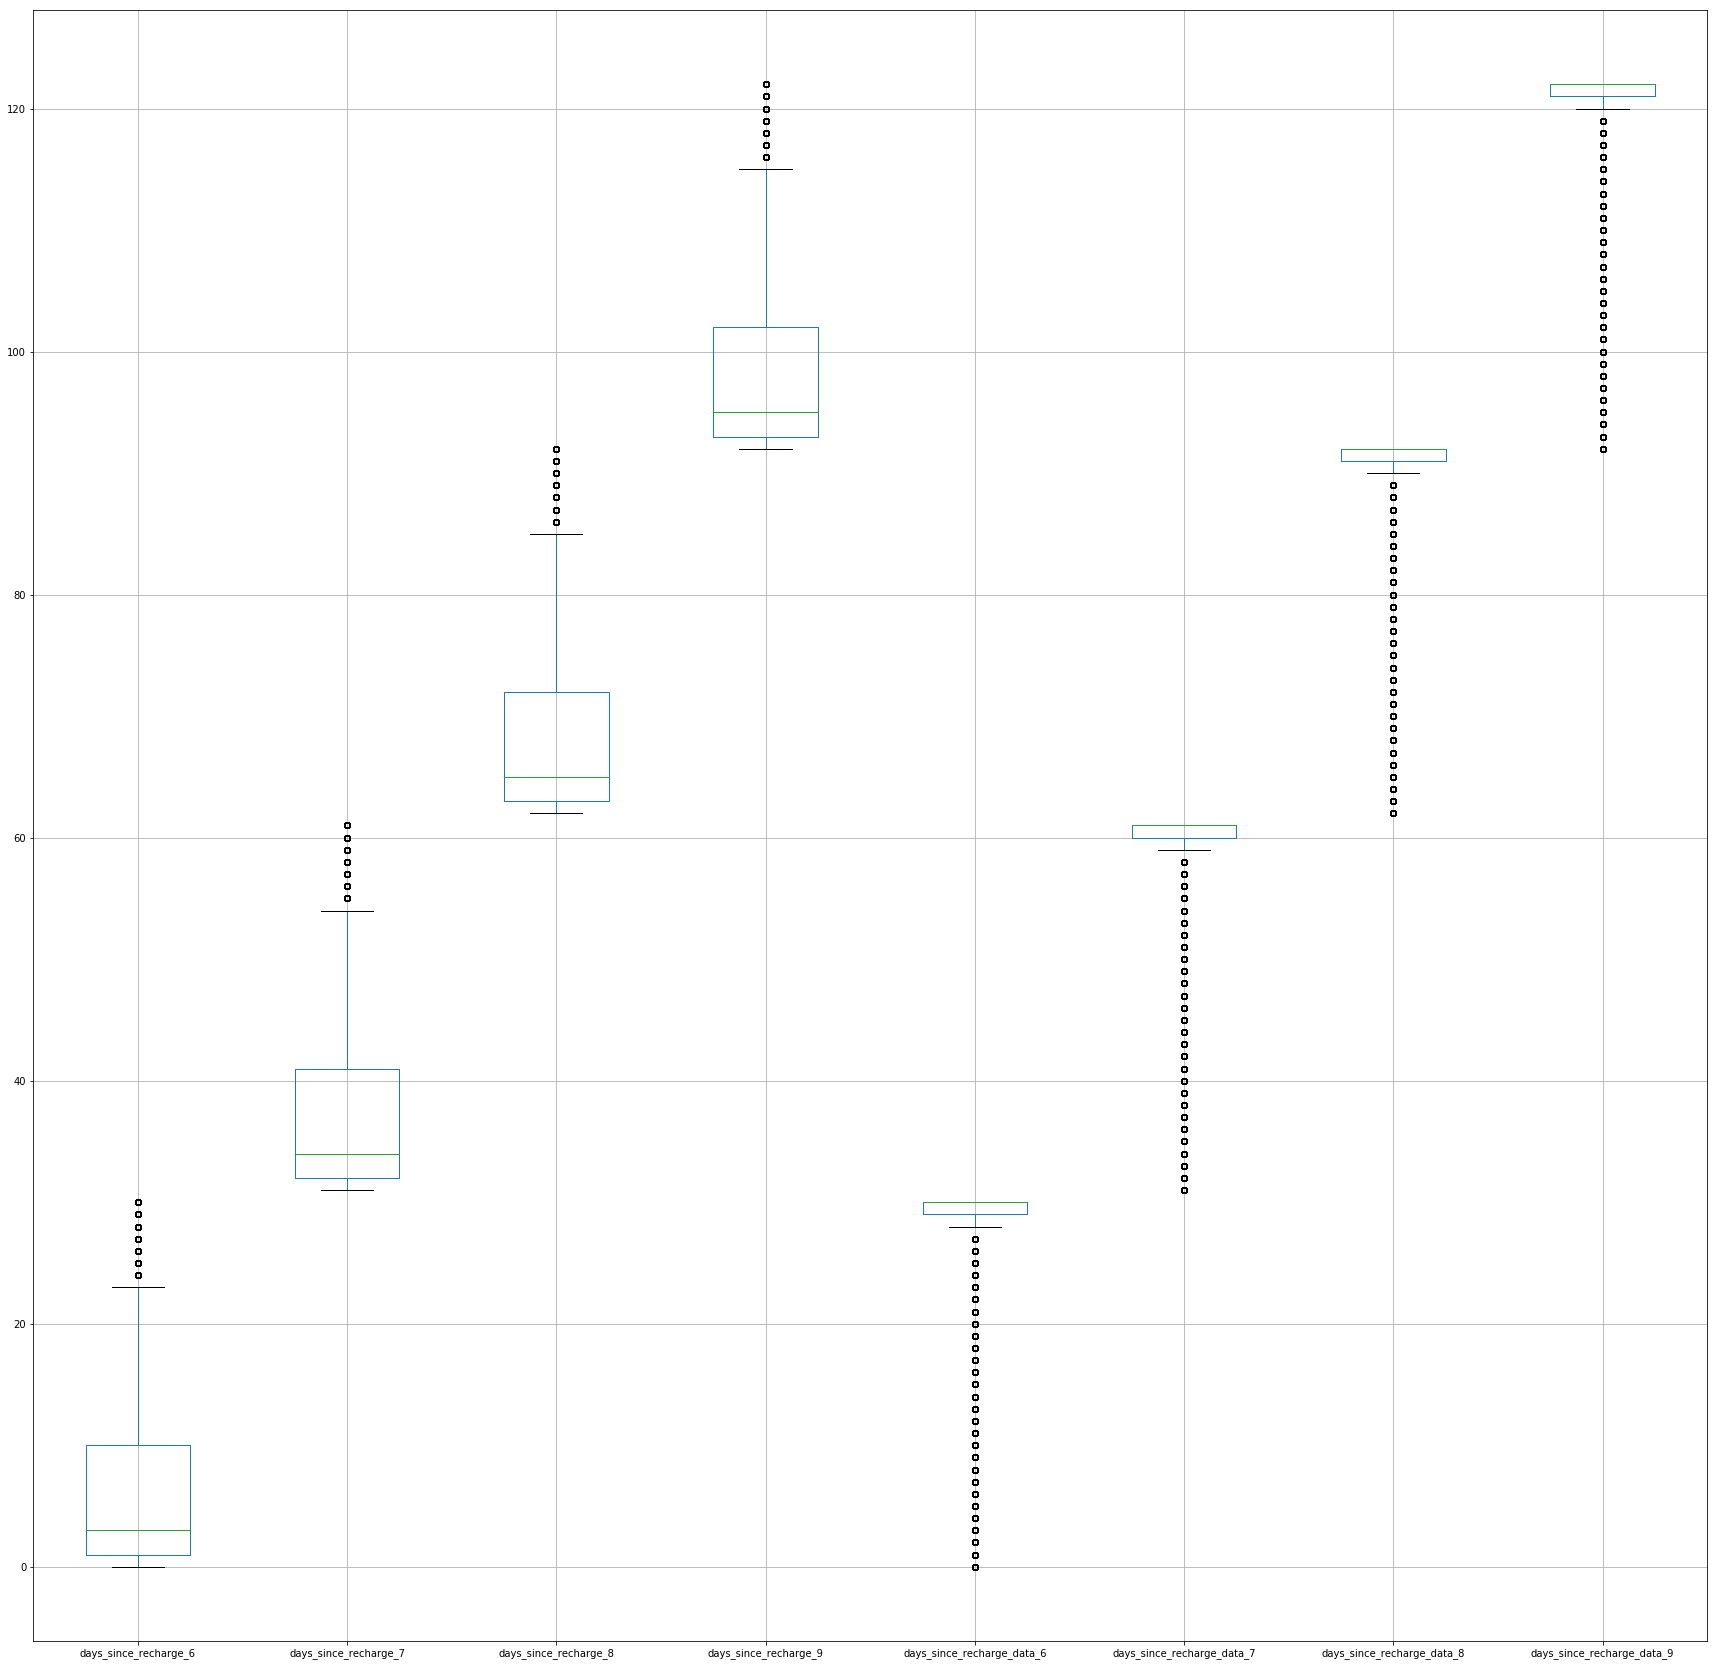

In [33]:
#What are the monthly treands in customer recharges
customers.boxplot(column=['days_since_recharge_6','days_since_recharge_7',
                          'days_since_recharge_8','days_since_recharge_9',
                          'days_since_recharge_data_6','days_since_recharge_data_7',
                          'days_since_recharge_data_8','days_since_recharge_data_9'],figsize=(30,30))

In [34]:
#Derive binary fields to check customer usage in various types of serives
customers['uses_isd_6'] = customers['isd_og_mou_6'].where(customers['isd_og_mou_6'] == 0,1).astype(int)
customers['uses_isd_7'] = customers['isd_og_mou_7'].where(customers['isd_og_mou_7'] == 0,1).astype(int)
customers['uses_isd_8'] = customers['isd_og_mou_8'].where(customers['isd_og_mou_8'] == 0,1).astype(int)
customers['uses_isd_9'] = customers['isd_og_mou_9'].where(customers['isd_og_mou_9'] == 0,1).astype(int)

customers['uses_3g_6'] = customers['vol_3g_mb_6'].where(customers['vol_3g_mb_6'] == 0,1).astype(int)
customers['uses_3g_7'] = customers['vol_3g_mb_7'].where(customers['vol_3g_mb_7'] == 0,1).astype(int)
customers['uses_3g_8'] = customers['vol_3g_mb_8'].where(customers['vol_3g_mb_8'] == 0,1).astype(int)
customers['uses_3g_9'] = customers['vol_3g_mb_9'].where(customers['vol_3g_mb_9'] == 0,1).astype(int)
#Note customer preference for 3G is indicated by subscription and monthly transfer. Not VBC usage.

customers['uses_2g_6'] = customers['vol_2g_mb_6'].where(customers['vol_2g_mb_6'] == 0,1).astype(int)
customers['uses_2g_7'] = customers['vol_2g_mb_7'].where(customers['vol_2g_mb_7'] == 0,1).astype(int)
customers['uses_2g_8'] = customers['vol_2g_mb_8'].where(customers['vol_2g_mb_8'] == 0,1).astype(int)
customers['uses_2g_9'] = customers['vol_2g_mb_9'].where(customers['vol_2g_mb_9'] == 0,1).astype(int)

customers['uses_special_6'] = customers['spl_og_mou_6'].where(customers['spl_og_mou_6'] == 0,1).astype(int)
customers['uses_special_7'] = customers['spl_og_mou_7'].where(customers['spl_og_mou_7'] == 0,1).astype(int)
customers['uses_special_8'] = customers['spl_og_mou_8'].where(customers['spl_og_mou_8'] == 0,1).astype(int)
customers['uses_special_9'] = customers['spl_og_mou_9'].where(customers['spl_og_mou_9'] == 0,1).astype(int)

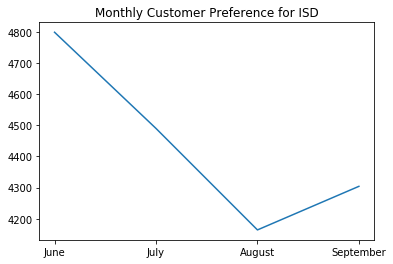

In [35]:
plt.title('Monthly Customer Preference for ISD')
plt.plot(customers[['uses_isd_6',
                    'uses_isd_7',
                    'uses_isd_8',
                    'uses_isd_9']].sum().rename({'uses_isd_6':'June',
                                                 'uses_isd_7':'July',
                                                 'uses_isd_8':'August',
                                                 'uses_isd_9':'September'},axis=0))

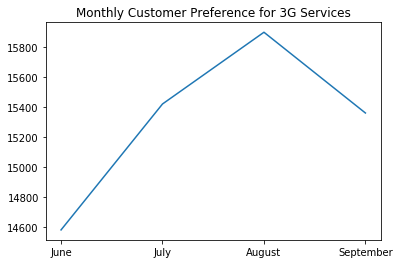

In [36]:
plt.title('Monthly Customer Preference for 3G Services')
plt.plot(customers[['uses_3g_6',
                    'uses_3g_7',
                    'uses_3g_8',
                    'uses_3g_9']].sum().rename({'uses_3g_6':'June',
                                                'uses_3g_7':'July',
                                                'uses_3g_8':'August',
                                                'uses_3g_9':'September'},axis=0))

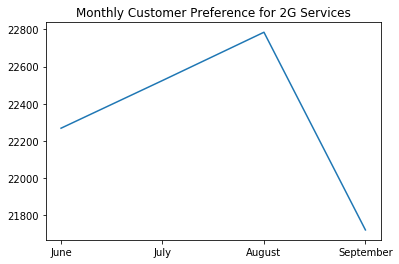

In [37]:
plt.title('Monthly Customer Preference for 2G Services')
plt.plot(customers[['uses_2g_6',
                    'uses_2g_7',
                    'uses_2g_8',
                    'uses_2g_9']].sum().rename({'uses_2g_6':'June',
                                                'uses_2g_7':'July',
                                                'uses_2g_8':'August',
                                                'uses_2g_9':'September'},axis=0))

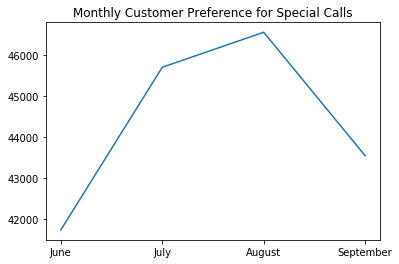

In [38]:
plt.title('Monthly Customer Preference for Special Calls')
plt.plot(customers[['uses_special_6',
                    'uses_special_7',
                    'uses_special_8',
                    'uses_special_9']].sum().rename({'uses_special_6':'June',
                                                     'uses_special_7':'July',
                                                     'uses_special_8':'August',
                                                     'uses_special_9':'September'},axis=0))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d412588>,
      dtype=object)

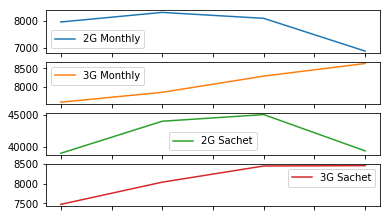

In [39]:
# Check data package user densities
ud_2g = customers[['monthly_2g_6',
                   'monthly_2g_7',
                   'monthly_2g_8',
                   'monthly_2g_9']].sum().rename({'monthly_2g_6':'June',
                                                  'monthly_2g_7':'July',
                                                  'monthly_2g_8':'August',
                                                  'monthly_2g_9':'September'},axis=0)
ud_3g = customers[['monthly_3g_6',
                   'monthly_3g_7',
                   'monthly_3g_8',
                   'monthly_3g_9']].sum().rename({'monthly_3g_6':'June',
                                                  'monthly_3g_7':'July',
                                                  'monthly_3g_8':'August',
                                                  'monthly_3g_9':'September'},axis=0)
ud_s_2g = customers[['sachet_2g_6',
                     'sachet_2g_7',
                     'sachet_2g_8',
                     'sachet_2g_9']].sum().rename({'sachet_2g_6':'June',
                                                   'sachet_2g_7':'July',
                                                   'sachet_2g_8':'August',
                                                   'sachet_2g_9':'September'},axis=0)
ud_s_3g = customers[['sachet_3g_6',
                     'sachet_3g_7',
                     'sachet_3g_8',
                     'sachet_3g_9']].sum().rename({'sachet_3g_6':'June',
                                                   'sachet_3g_7':'July',
                                                   'sachet_3g_8':'August',
                                                   'sachet_3g_9':'September'},axis=0)
data = pd.concat([ud_2g,
                  ud_3g,
                  ud_s_2g,
                  ud_s_3g],axis=1).rename(columns={0:'2G Monthly',
                                                   1:'3G Monthly',
                                                   2:'2G Sachet',3:'3G Sachet'})
data.plot(subplots=True)
#data

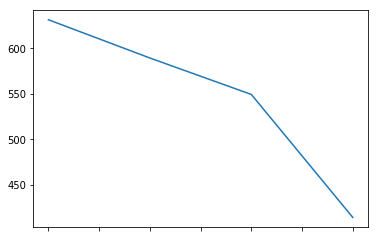

In [40]:
# Check usage of night pack
unp = customers[['night_pck_user_6',
                 'night_pck_user_7',
                 'night_pck_user_8',
                 'night_pck_user_9']].sum().rename({'night_pck_user_6':'June',
                                                    'night_pck_user_7':'July',
                                                    'night_pck_user_8':'August',
                                                    'night_pck_user_9':'September'},axis=0)
unp.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9370b8>,
      dtype=object)

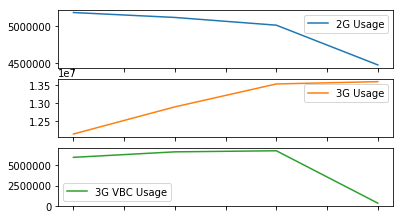

In [41]:
# Check if the laod on network is growing resulting in users not using Internet
u2g = customers[['vol_2g_mb_6',
                 'vol_2g_mb_7',
                 'vol_2g_mb_8',
                 'vol_2g_mb_9']].sum().rename({'vol_2g_mb_6':'June',
                                               'vol_2g_mb_7':'July',
                                               'vol_2g_mb_8':'August',
                                               'vol_2g_mb_9':'September'},axis=0)
u3g = customers[['vol_3g_mb_6',
                 'vol_3g_mb_7',
                 'vol_3g_mb_8',
                 'vol_3g_mb_9']].sum().rename({'vol_3g_mb_6':'June',
                                               'vol_3g_mb_7':'July',
                                               'vol_3g_mb_8':'August',
                                               'vol_3g_mb_9':'September'},axis=0)
uv3g = customers[['vbc_3g_6',
                  'vbc_3g_7',
                  'vbc_3g_8',
                  'vbc_3g_9']].sum().rename({'vbc_3g_6':'June',
                                             'vbc_3g_7':'July',
                                             'vbc_3g_8':'August',
                                             'vbc_3g_9':'September'},axis=0)
data = pd.concat([u2g,
                  u3g,
                  uv3g],axis=1).rename(columns={0:'2G Usage',
                                                1:'3G Usage',
                                                2:'3G VBC Usage'})
data.plot(subplots=True)

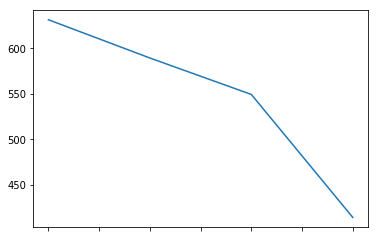

In [42]:
# Check usage of social networking services
ufb = customers[['fb_user_6',
                 'fb_user_7',
                 'fb_user_8',
                 'fb_user_9']].sum().rename({'fb_user_6':'June',
                                             'fb_user_7':'July',
                                             'fb_user_8':'August',
                                             'fb_user_9':'September'},axis=0)
unp.plot()

#### Inferences:
1. As can be noted from recharge box plots, the duration for recharge is increasing with time and there are many customers who recharge late on voice options while there are many customers who recharge their data packs early.
2. There is an inverse treand between ISD and Data Services
3. The preference for Data Services is dropping in the last month. This indicates that quality of service must be improved for customer retention.
4. As there is an inverse treand between ISD and data services, improvement of messenger and internet call app service response times can hold customers
5. There is a steep drop in special call services by customer. Special calls include customer support activities. Hence, this must be addressed immediately.
6. 2G Sachets seem to be the most preferred data pack. The users seem to be using 3G in VBC mode when required.
7. Usage of night packs has gradually decreased.
8. Load on network for data services is increasing and more users are switching to 3G services
9. Social networking services usage is reducing with increased access to data services

In [43]:
#### Merging of first two month data as it is a single phase, high value customer tagging, churn tagging

In [44]:
# Calculate user average recharge for two months of good phase (Months 6 and 7)
# Sum of voice and data recharge divided by number of months
# This has to be completed before merging information about two months of good phase.
customers['average_recharge_67']=customers[['total_rech_amt_6',
                                            'total_rech_data_6',
                                            'total_rech_amt_7',
                                            'total_rech_data_7']].sum(axis=1)/2.0

In [45]:
# Merge stats for months 6 and 7 as they are in a single phase
for column in customers.columns.values:
    if column.endswith('_6'):
        name = re.sub('_6','',column)
        if name.startswith('uses_'):
            customers[name+'_67'] = customers[[name+'_6',name+'_7']].max(axis=1)
        elif name.startswith('monthly'):
            customers[name+'_67'] = customers[[name+'_6',name+'_7']].max(axis=1)
        elif name.startswith('sachet'):
            customers[name+'_67'] = customers[[name+'_6',name+'_7']].max(axis=1)
        elif name.startswith('fb'):
            customers[name+'_67'] = customers[[name+'_6',name+'_7']].max(axis=1)
        elif name.startswith('night'):
            customers[name+'_67'] = customers[[name+'_6',name+'_7']].max(axis=1)
        elif name.startswith('last'):
            customers[name+'_67'] = customers[name+'_7']
        elif name.startswith('days'):
            customers[name+'_67'] = customers[name+'_7']
        elif name.startswith('av'):
            customers[name+'_67'] = (customers[name+'_6']+customers[name+'_6'])/2.0
        elif name.startswith('arpu'):
            customers[name+'_67'] = (customers[name+'_6']+customers[name+'_6'])/2.0
        elif name.startswith('max'):
            customers[name+'_67'] = customers[[name+'_6',name+'_7']].max(axis=1)
        else:
            customers[name+'_67'] = (customers[name+'_6']+customers[name+'_6'])
        customers.drop([name+'_6',name+'_7'],inplace=True, axis=1)

#### Filter high-value customers

In [46]:
cutoff = round(customers['average_recharge_67'].quantile(0.7))
customers['high_value'] = customers['average_recharge_67'].where(customers['average_recharge_67']>=cutoff,0)
customers['high_value'] = customers['high_value'].where(customers['high_value']==0,1).astype(int)
customers['high_value'].astype(int)
customers = customers[customers['high_value']==1]

#### Tag churners and remove attributes of the churn phase
TO tag churners, following columns are used

- `total_ic_mou_9`
- `total_og_mou_9`
- `vol_2g_mb_9`
- `vol_3g_mb_9`

(As churners do not use services)

**Note**: `vbc_3g_9` is not considered here as problem statement clearly mentions the use of only these four columns. However, on exploring original data frame before filtering high-value customsers, there are users who use vbc 3G services while not using any other service.

In [47]:
customers['churn'] = np.where(customers[['total_ic_mou_9',
                                         'total_og_mou_9',
                                         'vol_2g_mb_9',
                                         'vol_3g_mb_9']].sum(axis=1) == 0,
                                                                        1,
                                                                        0)


#### Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [48]:
customers = customers.drop([column for column in customers.columns if column.endswith('_9')], axis=1)

#### Renaming our Data Frame as churn_data_hv. (stands for Churnn data High Value)

In [49]:
churn_data_hv = customers
churn_data_hv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 7 to 99997
Columns: 128 entries, mobile_number to churn
dtypes: datetime64[ns](2), float64(95), int64(31)
memory usage: 29.5 MB


0    27401
1     2590
Name: churn, dtype: int64

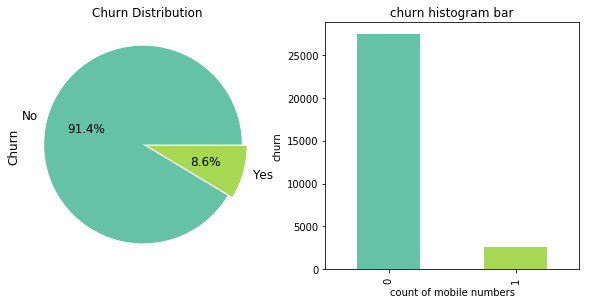

In [50]:
#Churn Distribution

plt.figure(1 , figsize=(20, 10))
plt.subplot(2, 2, 1)
explode = (0.05,0)
cmap = plt.get_cmap("Set2")
cd = (churn_data_hv['churn'].value_counts()*100.0 /len(churn_data_hv)).plot.pie(autopct='%.1f%%',
                                                                                labels = ['No', 'Yes'],
                                                                                figsize =(10,10), 
                                                                                explode= explode ,
                                                                                colors=cmap(np.arange(3)*4),
                                                                                fontsize = 12 )                                                                           

cd.set_ylabel('Churn',fontsize = 12)
cd.set_title('Churn Distribution', fontsize = 12)

plt.subplot(2, 2, 2)

churn_data_hv.groupby(['churn'])['mobile_number'].count().plot.bar( colors=cmap(np.arange(3)*4))

plt.title('churn histogram bar')
plt.xlabel('count of mobile numbers')
plt.ylabel('churn')
churn_data_hv.churn.value_counts()




##### As can be very clearly seen, Just `8.6%` records tagged as Churners (`churn=1`). Dataset is highly imbalanced and we need to balance the dataset

##### Date columns are not useful from here on since we have derived columns from them, so remove the date columns

In [51]:
churn_data_hv.drop(columns=['last_date_of_month_8','last_date_of_month_67'],inplace=True)

In [52]:
print('Shape of high value customer data:',churn_data_hv.shape)

Shape of high value customer data: (29991, 126)


In [53]:
churn_data_hv.head(2)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,days_since_recharge_8,days_since_recharge_data_8,usage_good_phase,usage_action_phase,usage_decrease,vol_good_phase,vol_action_phase,vol_usage_decrease,arpu_good_phase,arpu_action_phase,arpu_decrease,uses_isd_8,uses_3g_8,uses_2g_8,uses_special_8,average_recharge_67,arpu_67,onnet_mou_67,offnet_mou_67,roam_ic_mou_67,roam_og_mou_67,loc_og_t2t_mou_67,loc_og_t2m_mou_67,loc_og_t2f_mou_67,loc_og_t2c_mou_67,loc_og_mou_67,std_og_t2t_mou_67,std_og_t2m_mou_67,std_og_t2f_mou_67,std_og_mou_67,isd_og_mou_67,spl_og_mou_67,og_others_67,total_og_mou_67,loc_ic_t2t_mou_67,loc_ic_t2m_mou_67,loc_ic_t2f_mou_67,loc_ic_mou_67,std_ic_t2t_mou_67,std_ic_t2m_mou_67,std_ic_t2f_mou_67,std_ic_mou_67,total_ic_mou_67,spl_ic_mou_67,isd_ic_mou_67,ic_others_67,total_rech_num_67,total_rech_amt_67,max_rech_amt_67,last_day_rch_amt_67,total_rech_data_67,max_rech_data_67,count_rech_2g_67,count_rech_3g_67,av_rech_amt_data_67,vol_2g_mb_67,vol_3g_mb_67,arpu_3g_67,arpu_2g_67,night_pck_user_67,monthly_2g_67,sachet_2g_67,monthly_3g_67,sachet_3g_67,fb_user_67,vbc_3g_67,days_since_recharge_67,days_since_recharge_data_67,uses_isd_67,uses_3g_67,uses_2g_67,uses_special_67,high_value,churn
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0.0,802,57.74,65.0,92.0,7979.39,2706.09,1,0.00,0.00,0,2419.030,3171.480,0,1,0,0,1,1185.0,1069.180,115.68,906.86,32.46,47.48,102.78,617.26,124.26,0.0,844.32,8.60,99.78,13.32,121.72,0.0,9.0,0.0,975.06,116.28,435.12,304.32,855.76,73.78,182.88,104.38,361.08,1252.92,0.42,4.12,31.48,10,3160,1580,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,37.48,34.0,61.0,1,0,0,1,1,1
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.0,0.0,0,3,0,0,1.0,315,21.03,67.0,92.0,4157.05,732.74,1,1106.95,11.97,1,870.944,157.192,1,0,1,1,1,520.0,378.721,827.38,189.32,0.00,0.00,594.26,161.92,0.00,0.0,756.18,233.12,27.38,0.00,260.52,0.0,0.0,0.0,1016.72,47.68,115.16,0.00,162.86,0.00,44.86,0.00,44.86,207.72,0.00,0.00,0.00,38,874,154,0,0.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1.0,244.32,36.0,61.0,0,1,1,0,1,0


#### End of Data preparation step - We have `29,991 rows` and `126 columns`

### MODELLING 
#### Perform Train-test split and scale the data accordingly

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Putting feature variable to X
X = churn_data_hv.drop(['churn','mobile_number'],axis=1)
cols = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Putting response variable to y
y = churn_data_hv['churn']

m = pd.DataFrame(churn_data_hv['mobile_number']).reset_index()
m.drop({'index'}, axis=1, inplace=True)


#### Note that we are stratifying the split

In [55]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=42)


In [56]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_train:',X_test.shape)
print('Shape of y_train:',y_test.shape)

Shape of X_train: (23992, 124)
Shape of y_train: (23992,)
Shape of X_train: (5999, 124)
Shape of y_train: (5999,)


##### `LOGISTIC REGRESSION` WITH `PRINCIPAL COMPONENT ANALYSIS(PCA)`

#### Let's construct a scree plot and identify number of components needed to describe the dataset

In [57]:
#Import the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [58]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [59]:
colnames =  cols
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.076699,0.216396,arpu_8
1,-0.029844,0.142665,onnet_mou_8
2,-0.011279,0.194952,offnet_mou_8
3,0.009384,0.017031,roam_ic_mou_8
4,0.004067,0.032731,roam_og_mou_8


**Inference**: Talktime and roaming seems to be the most crucial factors

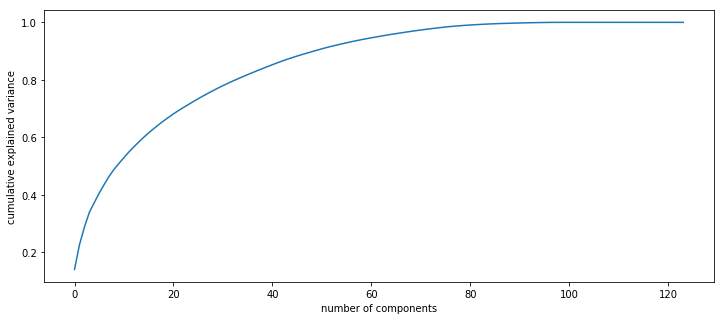

In [60]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [61]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [62]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

corrmat = np.corrcoef(df_train_pca.transpose())

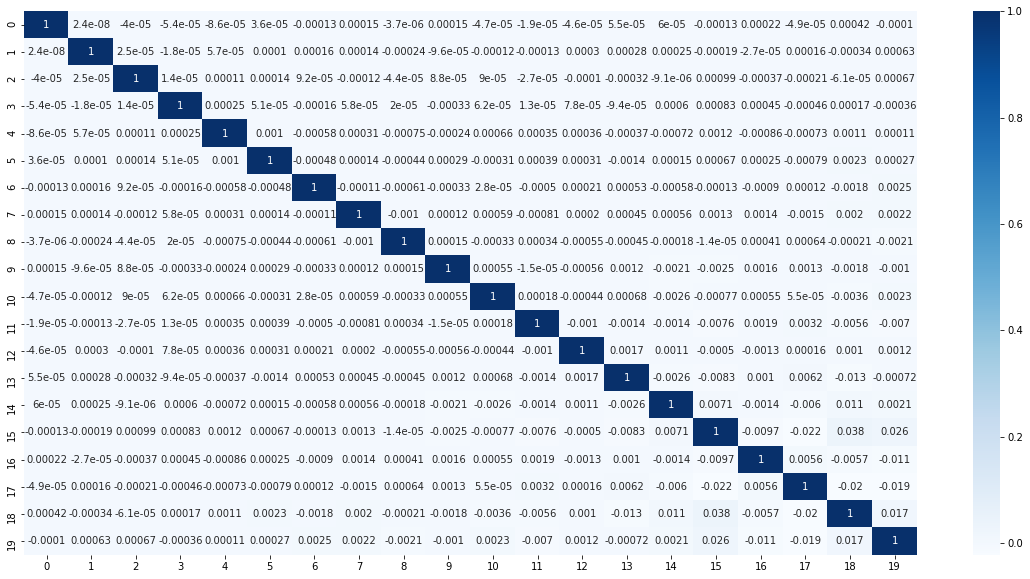

In [63]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True, cmap = "Blues" )

In [64]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.03769324652043211 , min corr:  -0.022015262918795683


##### We had randomly chosen number of components as 20; we can in fact attempt to get the best component value programmatically

#### To identify the best possible components, let's utilize Incremental PCA. We will run fitting our PCA in loop and examine the accuracy of test and train data and pick the best one forward

In [65]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Note that for handling `Class imbalance` as was showcased in pie chart/bar plot above, we are using keyword `class_weight='balanced'` within `LogisticRegression` function to take care that this Class imbalance does not affect our precision of prediction

In [66]:
print('------------------------------')
for components in range (5,60,1):
        pca_loop =  IncrementalPCA(n_components=components)
        print('# Components:', components)
        df_train_pca = pca_loop.fit_transform(X_train)
        print('Training sample shape: ',df_train_pca.shape)
        #training the regression model
        learner_pca = LogisticRegression(class_weight='balanced')
        model_pca = learner_pca.fit(df_train_pca,y_train)
        
        
        df_test_pca = pca_loop.transform(X_test)
        print('Test sample shape:', df_test_pca.shape)
        # Accuracy of Testing data
        pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
        print('Test ROC AUC score:', "{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
        # Accuracy of Training data
        pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
        print('Train ROC AUC score:',"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train)))
        print('------------------------------')

------------------------------
# Components: 5
Training sample shape:  (23992, 5)
Test sample shape: (5999, 5)
Test ROC AUC score: 0.82
Train ROC AUC score: 0.8
------------------------------
# Components: 6
Training sample shape:  (23992, 6)
Test sample shape: (5999, 6)
Test ROC AUC score: 0.85
Train ROC AUC score: 0.83
------------------------------
# Components: 7
Training sample shape:  (23992, 7)
Test sample shape: (5999, 7)
Test ROC AUC score: 0.87
Train ROC AUC score: 0.85
------------------------------
# Components: 8
Training sample shape:  (23992, 8)
Test sample shape: (5999, 8)
Test ROC AUC score: 0.87
Train ROC AUC score: 0.85
------------------------------
# Components: 9
Training sample shape:  (23992, 9)
Test sample shape: (5999, 9)
Test ROC AUC score: 0.88
Train ROC AUC score: 0.86
------------------------------
# Components: 10
Training sample shape:  (23992, 10)
Test sample shape: (5999, 10)
Test ROC AUC score: 0.88
Train ROC AUC score: 0.86
--------------------------

Training sample shape:  (23992, 55)
Test sample shape: (5999, 55)
Test ROC AUC score: 0.90
Train ROC AUC score: 0.89
------------------------------
# Components: 56
Training sample shape:  (23992, 56)
Test sample shape: (5999, 56)
Test ROC AUC score: 0.91
Train ROC AUC score: 0.89
------------------------------
# Components: 57
Training sample shape:  (23992, 57)
Test sample shape: (5999, 57)
Test ROC AUC score: 0.91
Train ROC AUC score: 0.89
------------------------------
# Components: 58
Training sample shape:  (23992, 58)
Test sample shape: (5999, 58)
Test ROC AUC score: 0.91
Train ROC AUC score: 0.89
------------------------------
# Components: 59
Training sample shape:  (23992, 59)
Test sample shape: (5999, 59)
Test ROC AUC score: 0.91
Train ROC AUC score: 0.89
------------------------------


##### We go with `34 components`we get  `training accuracy` of `88%` and `test accuracy` of `90%`. If you carefully observe, no matter how many components we increase beyond 34, the test and train accuracy don't increase further nor decrease. So we fix components at 34

### Model 1 for tagging churnsers - PCA (Incremental) with Logistic regression

In [67]:
pca_chosen =  IncrementalPCA(n_components=34)
print('# Components:', pca_chosen)
df_train_pca = pca_loop.fit_transform(X_train)
print('Training sample shape: ',df_train_pca.shape)
 #training the regression model
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)
        
df_test_pca = pca_loop.transform(X_test)
print('Test sample shape:', df_test_pca.shape)
# Accuracy of Testing data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
print('Test ROC AUC score:', "{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
# Accuracy of Training data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
print('Train ROC AUC score:',"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train)))

# Components: IncrementalPCA(batch_size=None, copy=True, n_components=34, whiten=False)
Training sample shape:  (23992, 59)
Test sample shape: (5999, 59)
Test ROC AUC score: 0.91
Train ROC AUC score: 0.89


In [68]:
corrmat = np.corrcoef(df_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.011778986598339803 , min corr:  -0.01737698266888321


##### As can be seen from Max Min Corr numbers above, there is very little correlation between components

##### Let's tag `churn_predicted` to `Train` dataset

In [69]:
y_train_pred_final = pd.DataFrame({'churn':y_train, 'churn_predicted':pred_probs_train})
y_train_pred_final = pd.merge(m, y_train_pred_final, left_index=True, right_index=True)
#y_train_pred_final['pred_idx'] = y_train.index
y_train_pred_final.head()

,mobile_number,churn,churn_predicted
7,7000149764,1,0.055674
8,7000815202,0,0.443002
13,7001682585,0,0.017180
16,7002393996,0,0.362139
17,7002402996,0,0.871101


#### Let's tag `churn_predicted` to `Test` dataset

In [70]:
y_test_pred_final = pd.DataFrame({'churn':y_test, 'churn_predicted':pred_probs_test})
y_test_pred_final = pd.merge(m, y_test_pred_final, left_index=True, right_index=True)
#y_train_pred_final['pred_idx'] = y_train.index
y_test_pred_final.head()

,mobile_number,churn,churn_predicted
48,7000810100,0,0.950134
56,7000451396,0,0.059115
60,7000248017,0,0.266112
73,7001689494,0,0.839392
103,7002168045,0,0.052906


In [71]:
print('Checking the total size matches High value customer dataset:', 
      y_train_pred_final.shape[0] + y_test_pred_final.shape[0])

Checking the total size matches High value customer dataset: 9045


#### Let's pick arbitrary number for  cutoff as 0.5 ; we will find the best value for this `Cutoff` this using `Specificity-Sensitivity` graph below

In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.churn_predicted.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,mobile_number,churn,churn_predicted,predicted
7,7000149764,1,0.055674,0
8,7000815202,0,0.443002,0
13,7001682585,0,0.017180,0
16,7002393996,0,0.362139,0
17,7002402996,0,0.871101,1


In [73]:
print(y_train_pred_final.groupby(["predicted"]).mobile_number.count())

predicted
0    5463
1    1805
Name: mobile_number, dtype: int64


#### ACCURACY ESTIMATION

#### Let's see Confusion matrix

In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
print(confusion)

[[5357 1259]
 [ 106  546]]


In [75]:
print("Accuracy score is : " , format(round(metrics.accuracy_score(y_train_pred_final.churn,
                                                             y_train_pred_final.predicted),3)))

Accuracy score is :  0.812


In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity of Logistic Regression model", format(TP / float(TP+FN)))
print("Specificity of Logistic Regression model", format(TN / float(TN+FP)))
print("False Positive rate of Logistic Regression model", format(FP/ float(TN+FP)))
print("Positive Predictive value of Logistic Regression model", format(TP / float(TP+FP)))
print("Negative Predictive value of Logistic Regression model", format(TN / float(TN+ FN)))

Sensitivity of Logistic Regression model 0.8374233128834356
Specificity of Logistic Regression model 0.8097037484885127
False Positive rate of Logistic Regression model 0.1902962515114873
Positive Predictive value of Logistic Regression model 0.30249307479224374
Negative Predictive value of Logistic Regression model 0.9805967417170053


##### Let's draw Receiver Operating Characteristic graph (ROC)

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic graph')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, 
                                         y_train_pred_final.predicted, drop_intermediate = False )

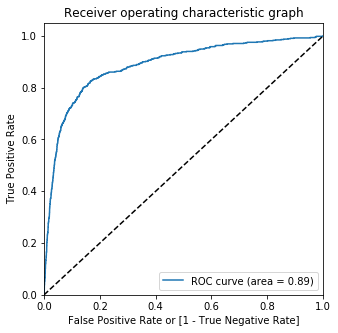

In [79]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_predicted)

##### ROC Curve is good as area under the curve is  89%

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_predicted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,mobile_number,churn,churn_predicted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7,7000149764,1,0.055674,0,1,0,0,0,0,0,0,0,0,0
8,7000815202,0,0.443002,0,1,1,1,1,1,0,0,0,0,0
13,7001682585,0,0.017180,0,1,0,0,0,0,0,0,0,0,0
16,7002393996,0,0.362139,0,1,1,1,1,0,0,0,0,0,0
17,7002402996,0,0.871101,1,1,1,1,1,1,1,1,1,1,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.089708     1.000000     0.000000
0.1          0.1  0.372179     0.970859     0.313180
0.2          0.2  0.528894     0.940184     0.488362
0.3          0.3  0.645432     0.906442     0.619710
0.4          0.4  0.736516     0.866564     0.723700
0.5          0.5  0.812190     0.837423     0.809704
0.6          0.6  0.864337     0.771472     0.873489
0.7          0.7  0.901624     0.691718     0.922310
0.8          0.8  0.919097     0.564417     0.954051
0.9          0.9  0.921299     0.274540     0.985036


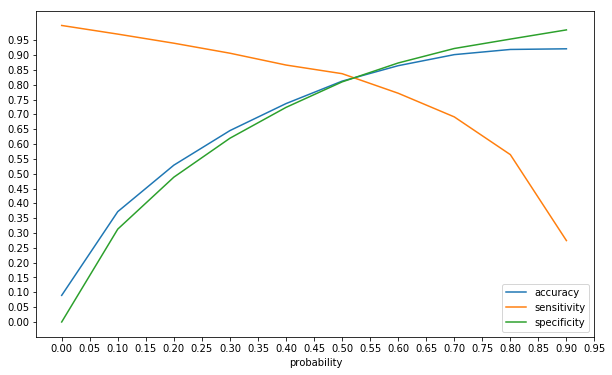

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))
plt.yticks(np.arange(0, 1, 0.05))
plt.xticks(np.arange(0, 1, 0.05))
plt.show()

#### From `Specificity-Sensitivity-Accuracy` curve above, we arrive at the cut-off number which is where all the lines intersect , `0.52`

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_predicted.map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_final.head()

,mobile_number,churn,churn_predicted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7,7000149764,1,0.055674,0,1,0,0,0,0,0,0,0,0,0,0
8,7000815202,0,0.443002,0,1,1,1,1,1,0,0,0,0,0,0
13,7001682585,0,0.017180,0,1,0,0,0,0,0,0,0,0,0,0
16,7002393996,0,0.362139,0,1,1,1,1,0,0,0,0,0,0,0
17,7002402996,0,0.871101,1,1,1,1,1,1,1,1,1,1,0,1


In [84]:
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_predicted.map( lambda x: 1 if x > 0.52 else 0)

y_test_pred_final.head()

,mobile_number,churn,churn_predicted,final_predicted
48,7000810100,0,0.950134,1
56,7000451396,0,0.059115,0
60,7000248017,0,0.266112,0
73,7001689494,0,0.839392,1
103,7002168045,0,0.052906,0


#### Analysis of overall accuracy

#### Compute Precision and Recall
\begin{equation}
Precision = \frac{TP}{TP + FP}
\end{equation}

\begin{equation}
Recall = \frac{TP}{TP + FN}
\end{equation}

In [85]:
from sklearn.metrics import precision_recall_curve

In [86]:
confusion = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion

array([[1334,  292],
       [  24,  127]])

In [87]:
print("Precision is :", format(confusion[1,1]/(confusion[0,1]+confusion[1,1])))
print("Recall is :", format(confusion[1,1]/(confusion[1,0]+confusion[1,1])))

Precision is : 0.3031026252983294
Recall is : 0.8410596026490066


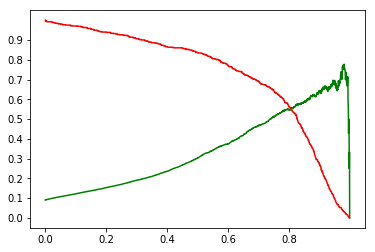

In [88]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 1, 0.2))
plt.show()

In [89]:
# Let's check the overall accuracy.
print("Overall model accuracy (on train data set):" , format(round(metrics.accuracy_score(y_train_pred_final.churn, 
                                                          y_train_pred_final.final_predicted),3)*100), '%')

Overall model accuracy (on train data set): 82.8 %


In [90]:
confusion_cutoff = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion_cutoff

array([[5478, 1138],
       [ 112,  540]])

In [91]:
TP = confusion_cutoff[1,1] # true positive 
TN = confusion_cutoff[0,0] # true negatives
FP = confusion_cutoff[0,1] # false positives
FN = confusion_cutoff[1,0] # false negatives
print("Sensitivity of Logistic Regression model (on PCA) : ", format(TP / float(TP+FN)))
print("Specificity of Logistic Regression model (on PCA) : ", format(TN / float(TN+FP)))
print("False Positive rate of Logistic Regression model (on PCA) : ", format(FP/ float(TN+FP)))
print("Positive Predictive value of Logistic Regression model (on PCA) : ", format(TP / float(TP+FP)))
print("Negative Predictive value of Logistic Regression model(on PCA) : ", format(TN / float(TN+ FN)))

Sensitivity of Logistic Regression model (on PCA) :  0.8282208588957055
Specificity of Logistic Regression model (on PCA) :  0.8279927448609432
False Positive rate of Logistic Regression model (on PCA) :  0.17200725513905682
Positive Predictive value of Logistic Regression model (on PCA) :  0.3218116805721097
Negative Predictive value of Logistic Regression model(on PCA) :  0.9799642218246869


#### Let's combine test and train predictionn and prepare mobile number and prediction (churn/ no churn - 1/0 ) field to make the prediction usable!

In [92]:
y_train_pred_final.shape
y_test_pred_final.shape

tmp_train_df = y_train_pred_final[['mobile_number', 'final_predicted' , 'churn']]
tmp_test_df = y_test_pred_final[['mobile_number', 'final_predicted' , 'churn']]

final_pca_df = pd.concat([tmp_train_df,tmp_test_df])

print('Dataframe shape of Final usable predictions : ' , final_pca_df.shape)
final_pca_df.head(2)

Dataframe shape of Final usable predictions :  (9045, 3)


,mobile_number,final_predicted,churn
7,7000149764,0,1
8,7000815202,0,0


#### Predicted Score distribution of `Logistic regression with PCA` (Test and Train combined predictions)

0    6948
1    2097
Name: final_predicted, dtype: int64

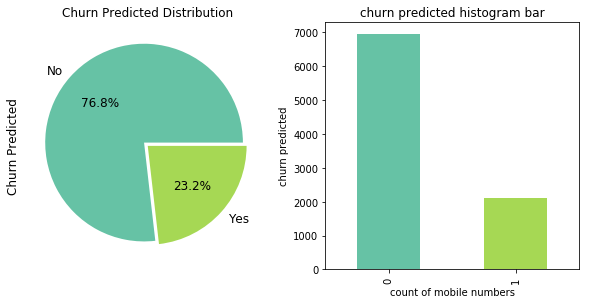

In [93]:
#Predicted score Distribution
plt.figure(1 , figsize=(20, 10))
plt.subplot(2, 2, 1)
explode = (0.05,0)
cmap = plt.get_cmap("Set2")
cd = (final_pca_df['final_predicted'].value_counts()*100.0 /len(final_pca_df)).plot.pie(autopct='%.1f%%',
                                                                                labels = ['No', 'Yes'],
                                                                                figsize =(10,10), 
                                                                                explode= explode ,
                                                                                colors=cmap(np.arange(3)*4),
                                                                                fontsize = 12 )                                                                           

cd.set_ylabel('Churn Predicted',fontsize = 12)
cd.set_title('Churn Predicted Distribution', fontsize = 12)

plt.subplot(2, 2, 2)

final_pca_df.groupby(['final_predicted'])['mobile_number'].count().plot.bar( colors=cmap(np.arange(3)*4))

plt.title('churn predicted histogram bar')
plt.xlabel('count of mobile numbers')
plt.ylabel('churn predicted')
final_pca_df.final_predicted.value_counts()

#### Summary of PCA and Logistic regression on the `Balanced` and `stratified` dataset  <br>
1) True negative(TN) are `non-churners`, True positives(TP) are `Churners`.  As per problem statement, `TP` accuracy is important as we don't want to miss churners <br>
2) So the model catches `81%` of customers who will `ACTUALLY CHURN` `(True positive rate or sensitivity)` <br>
3) Model catches `84%` of customers who will `NOT CHURN` `(True negative rate or specificity)` <br>
4) As per point `(2)`, since we are bothered about churners, `81% accuracy` makes this model `fairly decent` <br>



### Model 2.1 for tagging churnsers - SVM (Linear)
##### Linear SVM

 Building a linear SVM model (i.e. a linear kernel). 

In [94]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear',class_weight='balanced', random_state = 4 )

# fit
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=4,
  shrinking=True, tol=0.001, verbose=False)

In [95]:
# predict
predictions_svm = svm_linear.predict(X_test)

In [96]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_svm)
confusion

array([[4607,  874],
       [  73,  445]])

In [97]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions_svm)

0.842140356726121

In [98]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions_svm)
print(class_wise)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      5481
           1       0.34      0.86      0.48       518

   micro avg       0.84      0.84      0.84      5999
   macro avg       0.66      0.85      0.70      5999
weighted avg       0.93      0.84      0.87      5999



**NOTE**: Our classifier is a binary classifier. If we have 98% accuracy of predicting one class, it automatically allows us to predict the other class equally well. Hence, the high recall value.

In [99]:
import gc
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
gc.collect()

11869

### Model 2.2 for tagging churnsers - SVM (Non-Linear)

Let's now try a non-linear model with the RBF kernel.

In [100]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf',class_weight='balanced', random_state = 4 )
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=4,
  shrinking=True, tol=0.001, verbose=False)

In [101]:
# predict
predictions = svm_rbf.predict(X_test)

# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.8798133022170361


The accuracy achieved with a non-linear kernel is slightly higher than a linear one. Let's now do a grid search CV to tune the hyperparameters C and gamma.

#### Grid Search Cross-Validation

In [102]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf",class_weight='balanced')

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy',n_jobs=-1  )

# fit
clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [103]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,94.126729,0.850173,28.301421,0.505635,1,0.01,"{'C': 1, 'gamma': 0.01}",0.882096,0.878220,0.877314,0.879210,0.002074,3,0.901401,0.900963,0.903601,0.901988,0.001154
1,101.698441,1.223641,29.969654,0.156858,1,0.001,"{'C': 1, 'gamma': 0.001}",0.856089,0.850838,0.854427,0.853785,0.002192,6,0.859322,0.858322,0.857652,0.858432,0.000686
2,110.020952,16.428007,30.785261,2.679737,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.831458,0.825956,0.827414,0.828276,0.002327,9,0.831812,0.828248,0.825644,0.828568,0.002528
3,52.713013,1.154662,14.858665,0.021630,10,0.01,"{'C': 10, 'gamma': 0.01}",0.894099,0.890348,0.892196,0.892214,0.001531,2,0.939915,0.941416,0.940485,0.940605,0.000618
4,58.420093,1.144296,18.357587,0.427959,10,0.001,"{'C': 10, 'gamma': 0.001}",0.863966,0.862341,0.862931,0.863079,0.000672,5,0.876266,0.872890,0.874281,0.874479,0.001385
5,69.747904,2.568365,22.673809,0.195319,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.847212,0.838835,0.840545,0.842197,0.003614,8,0.847943,0.843441,0.841085,0.844157,0.002845
6,51.629397,0.192956,11.271821,0.347858,100,0.01,"{'C': 100, 'gamma': 0.01}",0.904351,0.900100,0.901201,0.901884,0.001802,1,0.973678,0.973177,0.972493,0.973116,0.000486
7,66.658363,1.967478,17.651648,2.573958,100,0.001,"{'C': 100, 'gamma': 0.001}",0.873843,0.870968,0.865433,0.870082,0.003490,4,0.898212,0.897337,0.896287,0.897278,0.000787
8,65.080535,1.469925,17.243732,0.556143,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.853213,0.844336,0.849050,0.848866,0.003627,7,0.856696,0.853195,0.854276,0.854722,0.001464


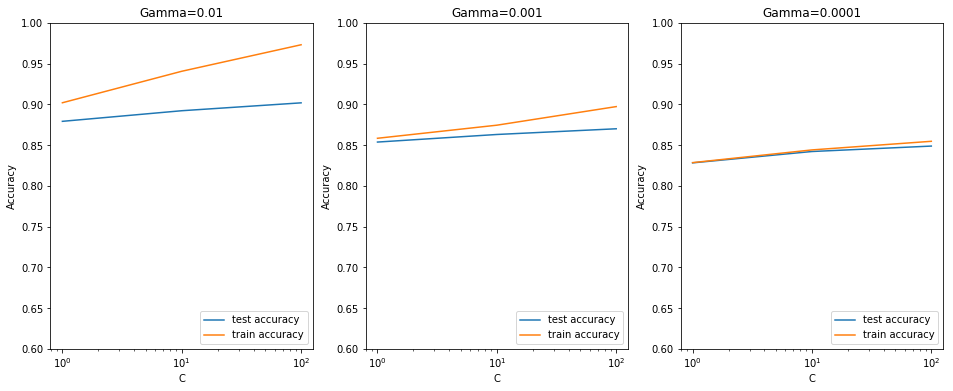

In [104]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')
# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

#### Final Model (Non-linear SVM) with optimal Hype parameters
Let's now build the final model with chosen hyperparameters.

In [105]:
# optimal hyperparameters
best_C = 10
best_gamma = 0.001 

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma,class_weight='balanced' , random_state = 4)

# fit
svm_final.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=4, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
# predict
svm_predictions = svm_final.predict(X_test)
svm_predictions_train = svm_final.predict(X_train)

In [107]:
# evaluation: CM 
confusion_svm = metrics.confusion_matrix(y_true = y_test, y_pred = svm_predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=svm_predictions)

print(test_accuracy, "\n")
print(confusion_svm)



0.8686447741290215 

[[4782  699]
 [  89  429]]


#### Let's tag Predictions on `Train SVM df`

In [108]:
y_train_pred_final_svm = pd.DataFrame({'churn':y_train, 'churn_predicted':svm_predictions_train})
y_train_pred_final_svm = pd.merge(m, y_train_pred_final_svm, left_index=True, right_index=True)
#y_train_pred_final['pred_idx'] = y_train.index
y_train_pred_final_svm.head()

,mobile_number,churn,churn_predicted
7,7000149764,1,1
8,7000815202,0,1
13,7001682585,0,0
16,7002393996,0,0
17,7002402996,0,1


#### Let's tag Predictions on `Test SVM df`

In [109]:
y_test_pred_final_svm = pd.DataFrame({'churn':y_test, 'churn_predicted':svm_predictions})
y_test_pred_final_svm = pd.merge(m, y_test_pred_final_svm, left_index=True, right_index=True)
#y_train_pred_final['pred_idx'] = y_train.index
y_test_pred_final_svm.head()

,mobile_number,churn,churn_predicted
48,7000810100,0,1
56,7000451396,0,0
60,7000248017,0,0
73,7001689494,0,1
103,7002168045,0,0


In [110]:
print("Accuracy score is : " , format(round(metrics.accuracy_score(y_train_pred_final_svm.churn,
                                                             y_train_pred_final_svm.churn_predicted),3)))

Accuracy score is :  0.877


In [111]:
TP = confusion_svm[1,1] # true positive 
TN = confusion_svm[0,0] # true negatives
FP = confusion_svm[0,1] # false positives
FN = confusion_svm[1,0] # false negatives
print("Sensitivity of Logistic Regression model", format(TP / float(TP+FN)))
print("Specificity of Logistic Regression model", format(TN / float(TN+FP)))
print("False Positive rate of Logistic Regression model", format(FP/ float(TN+FP)))
print("Positive Predictive value of Logistic Regression model", format(TP / float(TP+FP)))
print("Negative Predictive value of Logistic Regression model", format(TN / float(TN+ FN)))

Sensitivity of Logistic Regression model 0.8281853281853282
Specificity of Logistic Regression model 0.8724685276409414
False Positive rate of Logistic Regression model 0.12753147235905857
Positive Predictive value of Logistic Regression model 0.3803191489361702
Negative Predictive value of Logistic Regression model 0.9817285978238555


In [112]:
y_train_pred_final_svm.shape
y_train_pred_final_svm.shape

tmp_train_df_svm = y_train_pred_final_svm[['mobile_number', 'churn_predicted' , 'churn']]
tmp_test_df_svm = y_test_pred_final_svm[['mobile_number', 'churn_predicted' , 'churn']]

final_df_svm = pd.concat([tmp_train_df_svm,tmp_test_df_svm])

print('Dataframe shape of Final usable predictions : ' , final_df_svm.shape)
final_df_svm.head(2)

Dataframe shape of Final usable predictions :  (9045, 3)


,mobile_number,churn_predicted,churn
7,7000149764,1,1
8,7000815202,1,0


#### Predicted Score distribution of `Support Vector Machine` (Test and Train combined predictions)

0    7318
1    1727
Name: churn_predicted, dtype: int64

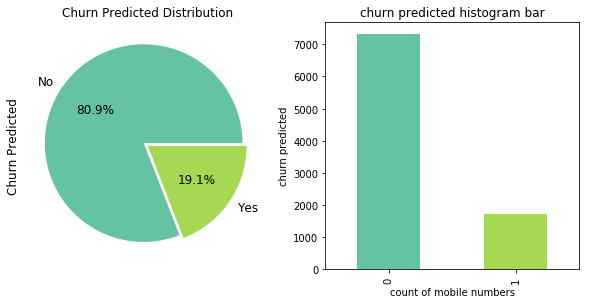

In [113]:
#Predicted score Distribution
plt.figure(1 , figsize=(20, 10))
plt.subplot(2, 2, 1)
explode = (0.05,0)
cmap = plt.get_cmap("Set2")
cd = (final_df_svm['churn_predicted'].value_counts()*100.0 /len(final_df_svm)).plot.pie(autopct='%.1f%%',
                                                                                labels = ['No', 'Yes'],
                                                                                figsize =(10,10), 
                                                                                explode= explode ,
                                                                                colors=cmap(np.arange(3)*4),
                                                                                fontsize = 12 )                                                                           

cd.set_ylabel('Churn Predicted',fontsize = 12)
cd.set_title('Churn Predicted Distribution', fontsize = 12)

plt.subplot(2, 2, 2)

final_df_svm.groupby(['churn_predicted'])['mobile_number'].count().plot.bar( colors=cmap(np.arange(3)*4))

plt.title('churn predicted histogram bar')
plt.xlabel('count of mobile numbers')
plt.ylabel('churn predicted')
final_df_svm.churn_predicted.value_counts()

In [114]:
final_df_svm.rename(columns = {'churn_predicted':'churn_svm'}, inplace = True)

**Summary**

Accuracy of Non-linear SVM Model (2.1) appears to be slightly better than Logistic regresssion (with PCA). Hence this model is selected for predicting churners.

### Model to Understand the Reason for Churn

##### DECISION TREE (Model A.1)

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Putting feature variable to X
X = churn_data_hv.drop(['churn','mobile_number'],axis=1)
rf_cols = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Putting response variable to y
y = churn_data_hv['churn']

m = pd.DataFrame(churn_data_hv['mobile_number']).reset_index()
m.drop({'index'}, axis=1, inplace=True)

In [116]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [117]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(rf_cols)
features [:5]

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8']

In [118]:
import os

In [119]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

# print to png file usinng pydotplus for display in the workbook; this can also be exported as pdf file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("dt_telecomchurn.png")

True

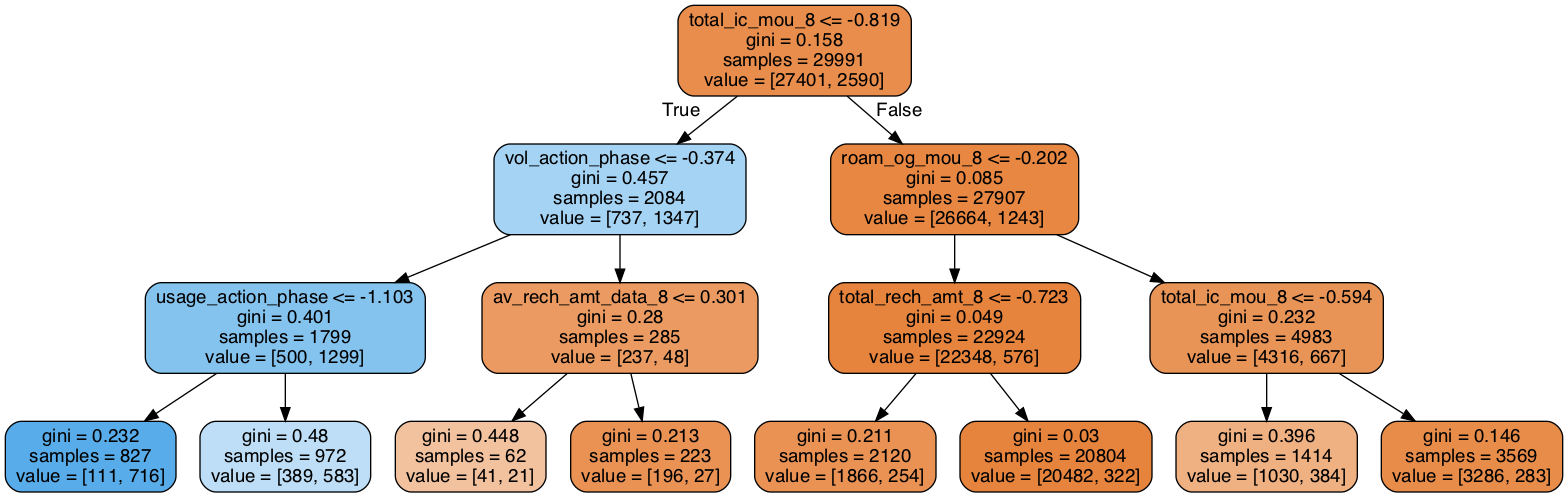

In [120]:
from IPython.display import Image

Image(filename=('dt_telecomchurn.png'))

#### RANDOM FOREST Model (Model A.2)

#### As per discussion forum, we found `class_weight={0:0.1, 1: 0.9}` ; We are using alternative `class_weight='balanced'.`

Reference: `https://learn.upgrad.com/v/course/208/question/125020`
    

In [121]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with class weight to handle class imbalance
#rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
rfc = RandomForestClassifier(class_weight='balanced')

In [122]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [123]:
# Making predictions
predictions = rfc.predict(X_test)

In [124]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [125]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5481
           1       0.79      0.45      0.57       518

   micro avg       0.94      0.94      0.94      5999
   macro avg       0.87      0.72      0.77      5999
weighted avg       0.94      0.94      0.93      5999



In [126]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[5420   61]
 [ 287  231]]


In [127]:
print('Accuracy score: ' , accuracy_score(y_test,predictions)*100, '%')

Accuracy score:  94.19903317219537 %


#### That's a very good accuracy score! 

#### Hyperparameter tuning
`1) let's finetune max depth`

In [128]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [129]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.156934,0.004541,0.004657,0.000302,2,{'max_depth': 2},0.876433,0.890602,0.901000,0.874114,0.897040,0.887838,0.010807,4,0.881519,0.898036,0.892935,0.881838,0.892206,0.889307,0.006545
1,0.421444,0.019343,0.006069,0.000152,7,{'max_depth': 7},0.904355,0.903730,0.902459,0.896415,0.909962,0.903384,0.004330,3,0.920804,0.919241,0.915494,0.915755,0.916641,0.917587,0.002084
2,0.611633,0.011129,0.007307,0.000451,12,{'max_depth': 12},0.930819,0.929360,0.933722,0.927887,0.933097,0.930977,0.002201,2,0.963789,0.964310,0.962801,0.964103,0.957643,0.962529,0.002497
3,0.676900,0.018816,0.008174,0.000310,17,{'max_depth': 17},0.934361,0.934778,0.939558,0.934764,0.940392,0.936771,0.002634,1,0.978586,0.975825,0.976920,0.976816,0.976711,0.976971,0.000896


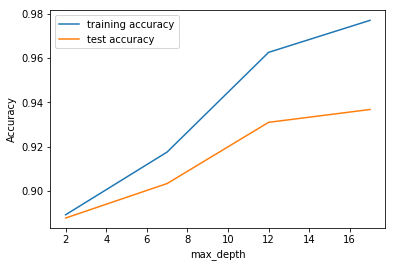

In [130]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### As can be seen after depth 12, Test score does not increase ; The ensemble tries to overfit as we increase the max_depth.

#### Instead of finetuning every hyperparameter, let's use  `GridSearchCV`

In [131]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [132]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [12], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [133]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8910470156718906 using {'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


#### Fit the final `RandomForest model` with the best parameters obtained from grid search.

In [134]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [135]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
# predict
predictions_test_rf = rfc.predict(X_test)

In [137]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [138]:
print(classification_report(y_test,predictions_test_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5481
           1       0.77      0.52      0.62       518

   micro avg       0.94      0.94      0.94      5999
   macro avg       0.86      0.75      0.79      5999
weighted avg       0.94      0.94      0.94      5999



In [139]:
confusion_rf = confusion_matrix(y_test,predictions_test_rf)

print(confusion_matrix(y_test,predictions_test_rf))

[[5399   82]
 [ 251  267]]


In [140]:
predictions_train_rf = rfc.predict(X_train)

In [141]:
print(classification_report(y_train,predictions_train_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     21920
           1       0.76      0.46      0.57      2072

   micro avg       0.94      0.94      0.94     23992
   macro avg       0.86      0.72      0.77     23992
weighted avg       0.93      0.94      0.93     23992



#### Let's tag Predictions on `Train random forest df`

In [142]:
y_train_pred_final_rf = pd.DataFrame({'churn':y_train, 'churn_predicted':predictions_train_rf})
y_train_pred_final_rf = pd.merge(m, y_train_pred_final_rf, left_index=True, right_index=True)
#y_train_pred_final['pred_idx'] = y_train.index
y_train_pred_final_rf.head()

,mobile_number,churn,churn_predicted
7,7000149764,1,0
8,7000815202,0,0
13,7001682585,0,0
16,7002393996,0,0
17,7002402996,0,1


#### Let's tag Predictions on `Test random forest df`

In [143]:
y_test_pred_final_rf = pd.DataFrame({'churn':y_test, 'churn_predicted':predictions_test_rf})
y_test_pred_final_rf = pd.merge(m, y_test_pred_final_rf, left_index=True, right_index=True)
#y_train_pred_final['pred_idx'] = y_train.index
y_test_pred_final_rf.head()

,mobile_number,churn,churn_predicted
48,7000810100,0,0
56,7000451396,0,0
60,7000248017,0,0
73,7001689494,0,0
103,7002168045,0,0


In [144]:
print("Accuracy score is : " , format(round(metrics.accuracy_score(y_train_pred_final_rf.churn,
                                                             y_train_pred_final_rf.churn_predicted),3)))

Accuracy score is :  0.939


In [145]:
y_train_pred_final_rf.shape
y_test_pred_final_rf.shape

tmp_train_df_rf = y_train_pred_final_rf[['mobile_number', 'churn_predicted' , 'churn']]
tmp_test_df_rf = y_test_pred_final_rf[['mobile_number', 'churn_predicted' , 'churn']]

final_pca_df_rf = pd.concat([tmp_train_df_rf,tmp_test_df_rf])

print('Dataframe shape of Final usable predictions : ' , final_pca_df_rf.shape)
final_pca_df_rf.head(2)

Dataframe shape of Final usable predictions :  (9045, 3)


,mobile_number,churn_predicted,churn
7,7000149764,0,1
8,7000815202,0,0


#### Predicted Score distribution of `RandomForest Classifier` (Test and Train combined predictions)

0    8532
1     513
Name: churn_predicted, dtype: int64

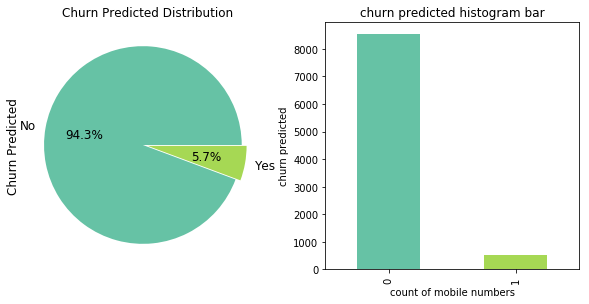

In [146]:
#Predicted score Distribution of Random forest
plt.figure(1 , figsize=(20, 10))
plt.subplot(2, 2, 1)
explode = (0.05,0)
cmap = plt.get_cmap("Set2")
cd = (final_pca_df_rf['churn_predicted'].value_counts()*100.0 /len(final_pca_df_rf)).plot.pie(autopct='%.1f%%',
                                                                                labels = ['No', 'Yes'],
                                                                                figsize =(10,10), 
                                                                                explode= explode ,
                                                                                colors=cmap(np.arange(3)*4),
                                                                                fontsize = 12 )                                                                           

cd.set_ylabel('Churn Predicted',fontsize = 12)
cd.set_title('Churn Predicted Distribution', fontsize = 12)

plt.subplot(2, 2, 2)

final_pca_df_rf.groupby(['churn_predicted'])['mobile_number'].count().plot.bar( colors=cmap(np.arange(3)*4))

plt.title('churn predicted histogram bar')
plt.xlabel('count of mobile numbers')
plt.ylabel('churn predicted')
final_pca_df_rf.churn_predicted.value_counts()

In [147]:
from sklearn.feature_selection import SelectFromModel
# Print the name and gini importance of each feature

#### Predictor variables for identifying customers likely to `Churn`  - (Arrange the variables in "Ascending order" of the gini index/ feature importance) 

In [169]:
a = pd.DataFrame({'features': rf_cols, 'feature_importance': rfc.feature_importances_})
a = a.loc[ (a['feature_importance'] > 0) , :]
a.sort_values(by='feature_importance', ascending=True).head(10)

,features,feature_importance
47,sachet_3g_8,0.000001
44,monthly_2g_8,0.000004
114,sachet_3g_67,0.000012
62,uses_isd_8,0.000013
111,monthly_2g_67,0.000013
103,count_rech_2g_67,0.000017
61,arpu_decrease,0.000021
79,std_og_t2f_mou_67,0.000021
45,sachet_2g_8,0.000025
55,usage_decrease,0.000026


#### Predictor variables where company is already doing well  - (Arrange the variables in "Descending order" of the gini index/ feature importance) 

In [170]:
a = pd.DataFrame({'features': rf_cols, 'feature_importance': rfc.feature_importances_})
a = a.loc[ (a['feature_importance'] > 0) , :]
a.sort_values(by='feature_importance', ascending=False).head(10)

,features,feature_importance
21,loc_ic_mou_8,0.092438
26,total_ic_mou_8,0.092000
19,loc_ic_t2m_mou_8,0.072750
17,total_og_mou_8,0.069585
9,loc_og_mou_8,0.061704
54,usage_action_phase,0.061212
0,arpu_8,0.059096
18,loc_ic_t2t_mou_8,0.053432
6,loc_og_t2m_mou_8,0.044597
60,arpu_action_phase,0.044085


#### Compare the three model (1,2.2,A.2) predictions, we will calculate truth for a given mobile number to guage accuracy

In [171]:
final_pca_df.rename(columns = {'final_predicted':'churn_logit_pca'}, inplace = True)
final_pca_df_rf.rename(columns = {'churn_predicted':'churn_rforest'}, inplace = True)
final_model_comparison = pd.merge(final_pca_df, final_pca_df_rf, left_index=True, right_index=True)
final_model_comparison = final_model_comparison.drop(['mobile_number_y','churn_y'],axis=1)
final_model_comparison.rename(columns = {'mobile_number_x':'mobile_number' , 'churn_x': 'churn'}, inplace = True)
final_model_comparison.head(2)

final_model_comparison = pd.merge(final_df_svm, final_model_comparison, left_index=True, right_index=True)

In [172]:
final_model_comparison = final_model_comparison.drop(['mobile_number_y','churn_y'],axis=1)
final_model_comparison.rename(columns = {'mobile_number_x':'mobile_number' , 'churn_x': 'churn'}, inplace = True)
final_model_comparison.head(2)

,mobile_number,churn_svm,churn,churn_logit_pca,churn_rforest
7,7000149764,1,1,0,0
8,7000815202,1,0,0,0


In [173]:
final_model_comparison['logit_pca_accuracy'] = np.where((final_model_comparison['churn_logit_pca'] == final_model_comparison['churn']), 1,0)
final_model_comparison['rforest_accuracy'] = np.where((final_model_comparison['churn_rforest'] == final_model_comparison['churn']), 1,0)
final_model_comparison['svm_accuracy'] = np.where((final_model_comparison['churn_svm'] == final_model_comparison['churn']), 1,0)

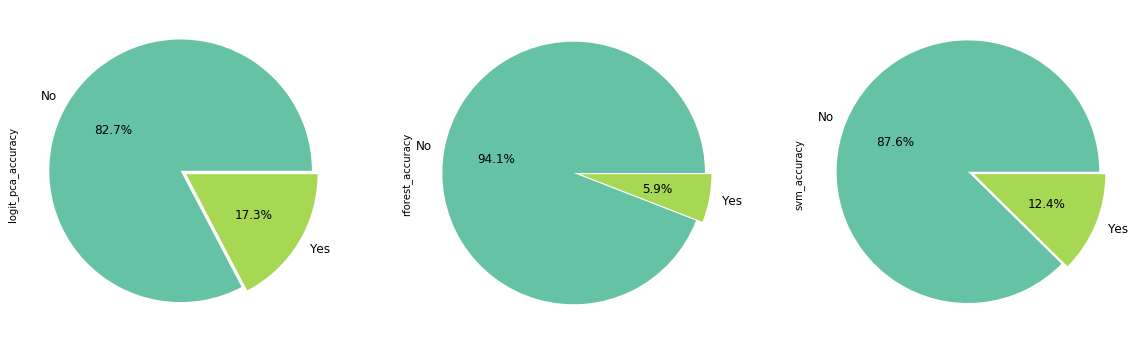

In [174]:
#Predicted score Distribution of Random forest
plt.figure(1 , figsize=(20, 10))
plt.subplot(1, 3, 1)
explode = (0.05,0)
cmap = plt.get_cmap("Set2")
cd = (final_model_comparison['logit_pca_accuracy'].value_counts()*100.0 /len(final_model_comparison)).plot.pie(autopct='%.1f%%',
                                                                                labels = ['No', 'Yes'],
                                                                                figsize =(20,10), 
                                                                                explode= explode ,
                                                                                colors=cmap(np.arange(3)*4),
                                                                                fontsize = 12 )     
plt.subplot(1, 3, 2)
explode = (0.05,0)
cmap = plt.get_cmap("Set2")
cd = (final_model_comparison['rforest_accuracy'].value_counts()*100.0 /len(final_model_comparison)).plot.pie(autopct='%.1f%%',
                                                                                labels = ['No', 'Yes'],
                                                                                figsize =(20,10), 
                                                                                explode= explode ,
                                                                                colors=cmap(np.arange(3)*4),
                                                                                fontsize = 12 ) 
plt.subplot(1, 3, 3)
explode = (0.05,0)
cmap = plt.get_cmap("Set2")
cd = (final_model_comparison['svm_accuracy'].value_counts()*100.0 /len(final_model_comparison)).plot.pie(autopct='%.1f%%',
                                                                                labels = ['No', 'Yes'],
                                                                                figsize =(20,10), 
                                                                                explode= explode ,
                                                                                colors=cmap(np.arange(3)*4),
                                                                                fontsize = 12 ) 

#### Summary

1) After predictions, we compared with the `Actual churn` to see how effective our predictions were, `Support Vector machines` and  `Logistic regression with PCA` provided a decent accuracy ; SVM provided better accuracy over Logit-PCA and is thus selected for goal 1 <br>

2) These variables help in identifying people who `Churn`as arranged with `Ascending` order of `gini index`:<br>

`features	feature_importance`<br>
`47	sachet_3g_8	0.000001`<br>
`44	monthly_2g_8	0.000004`<br>
`114	sachet_3g_67	0.000012`<br>
`62	uses_isd_8	0.000013`<br>
`111	monthly_2g_67	0.000013`<br>
`103	count_rech_2g_67	0.000017`<br>
`61	arpu_decrease	0.000021`<br>
`79	std_og_t2f_mou_67	0.000021`<br>
`45	sachet_2g_8	0.000025`<br>
`55	usage_decrease	0.000026`<br>

3) These variables help in identifying most important features that company `is already doing well` (obtained by `Descending` order of `gini index`  : <br>
`features	feature_importance`<br>
`21	loc_ic_mou_8	0.092438`<br>
`26	total_ic_mou_8	0.092000`<br>
`19	loc_ic_t2m_mou_8	0.072750`<br>
`17	total_og_mou_8	0.069585`<br>
`9	loc_og_mou_8	0.061704`<br>
`54	usage_action_phase	0.061212`<br>
`0	arpu_8	0.059096`<br>
`18	loc_ic_t2t_mou_8	0.053432`<br>
`6	loc_og_t2m_mou_8	0.044597`<br>
`60	arpu_action_phase	0.044085`<br>

In these features, ARPU can be ignored as it is not a user factor. However, it must be considered by the company as it brings in revenue.

### Final Observations and Recommendations
**Key observations**:
1. Important features that decide on who is likely to Churn out is indicated by Ascending order of Gini index ( example internet usage with service scheme validity smaller than a month; 2G usage, ISD call usage etc). This also indicated area of improvement (if improved, will see less churners) <br>
2. Features where company is already doing well is indicated by Descending order of Gini index (example local calls within same telecom group for incoming calls, outgoing minutes of usage etc). Features where company excels is good to know as company can continue providing the same level of service for these features. <br>


**Recommendations**: 
1. Maintain good quality service with less call drops for incoming mobile calls to retain current high value customsers 
2. Improve 3G services for voice and video calls to stop churners. The 3G service used in such cases seems to be on volume based cost.
3. FB and other social networking services can be removed and 3G service improved with the revenue saved. The load on data network is increasing and needs to be addressed immediately.
4. Customer service must address network issues on priority and ensure customer satisfaction.